# Load dataset

In [1]:
import pandas as pd
from sklearn.utils import class_weight
df = pd.read_csv("student-mat.csv")
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


# calculate output field

In [2]:
df["failornot"] = df["failures"].apply(lambda x: 0 if x == 0 else 1)

In [3]:
X = df[["studytime","freetime","goout"]]
y = df["failornot"]

# Split into train and test set

In [5]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

# Use SMOTE to generate synthetic data

In [8]:
os_X_train, os_y_train = smot.fit_sample(X_train, y_train)

# Load Logistic Regression model

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(os_X_train,os_y_train)

# Predict on test set and get accurary

In [13]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


# Get confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59 36]
 [13 11]]


# Draw confusion matrix

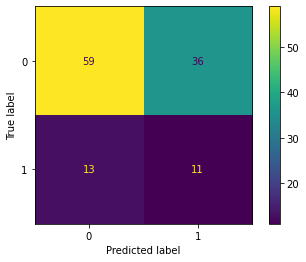

In [15]:
plot_confusion_matrix(model, X_test, y_test)

# Calculate classification metrics

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.62      0.71        95
           1       0.23      0.46      0.31        24

    accuracy                           0.59       119
   macro avg       0.53      0.54      0.51       119
weighted avg       0.70      0.59      0.63       119



# Plot ROC curve

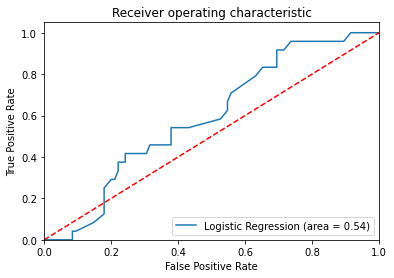

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()